# Определение перспективного тарифа для телеком компании


## Изучение данных из файла


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [8]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [11]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [12]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
df_users = pd.read_csv('/datasets/users.csv')

In [16]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

В нашем распоряжении 5 таблиц с данными о: звонках, использовании интернета, отправленных сообщениях, информация о параметрах тарифных планов и информация о пользователях. В таблицах нет пропусков. Надо изменить типы данных в датах, округлить значения количества минут и объёма интернет-трафика до целых чисел вверх и удалить лишний столбец в таблице с интернет-трафиком.

## Предобработка данных

В таблицах со звонками, сообщениями и объёмом трафика изменим тип данных у дат.

In [18]:
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

Длительность звонков в минутах и объём интернета в мегабайтах округлим вверх до ближайшего целого числа, тк нам известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов.
Добавим новые столбцы в таблицы df_calls и df_internet

In [21]:
def roundup(x): 
    return int(math.ceil(x))

In [22]:
df_calls['duration_int'] = df_calls['duration'].apply(roundup)

In [23]:
df_internet['mb_used_int'] = df_internet['mb_used'].apply(roundup)

Исправим ошибку в таблице df_internet: удалим лишний столбец - Unnamed: 0

In [24]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
df_internet.head()

,id,mb_used,session_date,user_id,mb_used_int
0,1000_0,112.95,2018-11-25,1000,113
1,1000_1,1052.81,2018-09-07,1000,1053
2,1000_2,1197.26,2018-06-25,1000,1198
3,1000_3,550.27,2018-08-22,1000,551
4,1000_4,302.56,2018-09-24,1000,303


### Вывод

Мы подготовили данные для расчётов: удалили лишний столбец в таблице df_internet, изменили типы данных у дат и округлили длительность звонков и объём интернет-трафика вверх до целого числа.

Мы заметили, что в таблице df_calls есть нулевые значения для длительности звонков. Возможно это пропущенные исходящие вызовы либо тот кто звонил сбросил, чтобы ему перезвонили.  Они не влияют на тарификацию, поэтому удалять их не будем.

## Расчёты

Добавим в таблицы df_calls, df_messages и df_internet информацию о месяцах.

In [26]:
df_calls['month'] = df_calls['call_date'].dt.month

In [27]:
df_messages['month'] = df_messages['message_date'].dt.month

In [28]:
df_internet['month'] = df_internet['session_date'].dt.month

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам:

In [29]:
pivot_calls = df_calls.pivot_table(
    index=['user_id', 'month'],
    values='duration_int',
    aggfunc=['count', 'sum'])

In [30]:
pivot_calls.columns = ['call_count', 'duration_sum']

In [31]:
pivot_calls.tail(20)

call_count  duration_sum
user_id month                          
1496    4              67           521
        5              63           484
        6              74           555
        7              73           582
        8              88           527
        9              68           486
        10             72           450
        11             80           662
        12             80           518
1497    10             66           490
        11             64           371
        12             71           545
1498    7              23           175
        8              57           400
        9              59           471
        10             41           247
1499    9               9            70
        10             68           449
        11             74           612
        12             69           492

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам:

In [32]:
pivot_mes = df_messages.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count')

In [33]:
pivot_mes.columns = ['message_count']

In [34]:
pivot_mes.tail(20)

message_count
user_id month               
1496    4                 49
        5                 40
        6                 35
        7                 42
        8                 41
        9                 29
        10                35
        11                46
        12                51
1497    10                20
        11                14
        12                17
1498    7                 20
        8                 62
        9                 44
        10                42
1499    9                 11
        10                48
        11                59
        12                66

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам:


In [35]:
pivot_int = df_internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used_int',
    aggfunc='sum')

In [36]:
pivot_int.columns = ['mb_used_sum']

In [37]:
pivot_int.tail(20)

mb_used_sum
user_id month             
1496    4            21098
        5            23740
        6            20163
        7            24395
        8            23560
        9            26970
        10           28215
        11           25092
        12           20757
1497    10           11512
        11           14174
        12           19940
1498    7             7486
        8            24270
        9            22166
        10           20604
1499    9             1848
        10           17809
        11           17984
        12           13077

Объединим три получившиеся таблицы в одну:

In [38]:
final_pivot = pivot_calls.join([pivot_mes, pivot_int], how='outer').reset_index()

In [39]:
final_pivot

,user_id,month,call_count,duration_sum,message_count,mb_used_sum
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20604.0
3210,1499,9,9.0,70.0,11.0,1848.0
3211,1499,10,68.0,449.0,48.0,17809.0
3212,1499,11,74.0,612.0,59.0,17984.0


Проверим корректность объединения, посмотрев на одного пользователя (1499):

In [40]:
final_pivot[final_pivot['user_id'] == 1499]

,user_id,month,call_count,duration_sum,message_count,mb_used_sum
3210,1499,9,9.0,70.0,11.0,1848.0
3211,1499,10,68.0,449.0,48.0,17809.0
3212,1499,11,74.0,612.0,59.0,17984.0
3213,1499,12,69.0,492.0,66.0,13077.0


Теперь займёмся объединением двух других таблиц: df_users и df_tariffs

In [41]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [42]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для того, чтобы объединить их по стобцу тарифа, переименуем сначала название этого столбца в таблице тарифов:

In [43]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})

In [44]:
users_tarif = df_users.merge(df_tariffs, on='tariff', how = 'outer')

In [45]:
users_tarif

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


Теперь объединим полученную таблицу со звонками, сообщениями и объёмом интернета с объединенной таблицей по пользователям и параметрам тарифов:

In [46]:
report = final_pivot.merge(users_tarif, on='user_id', how='left')

In [47]:
report

,user_id,month,call_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,9,9.0,70.0,11.0,1848.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,10,68.0,449.0,48.0,17809.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,11,74.0,612.0,59.0,17984.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


Проверим корректность объедининие на одном пользователе (1498)

In [48]:
report[report['user_id'] == 1498]

,user_id,month,call_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3206,1498,7,23.0,175.0,20.0,7486.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3207,1498,8,57.0,400.0,62.0,24270.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3208,1498,9,59.0,471.0,44.0,22166.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3209,1498,10,41.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


Посчитаем помесячную выручку с каждого пользователя:

In [49]:
def profit(row):
    total = 0    
    total_minutes = 0
    total_message = 0
    total_mb = 0
    rub_free = row['rub_monthly_fee']
    minutes = (row['duration_sum'] - row['minutes_included']) * row['rub_per_minute']
    message = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    mb = (row['mb_used_sum'] - row['mb_per_month_included']) / 1024 * row['rub_per_gb']

    if minutes > 0:
        total_minutes += minutes
    if message > 0:
        total_message += message
    if mb > 0:
        total_mb += mb
            
    total = total_minutes + total_message + total_mb + rub_free
    return total

In [50]:
report['profit'] = report.apply(profit, axis=1)

In [51]:
report.tail(5)

,user_id,month,call_count,duration_sum,message_count,mb_used_sum,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
3209,1498,10,41.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,2018-07-19,smart,50,15360,500,550,200,3,3,1574.218750
3210,1499,9,9.0,70.0,11.0,1848.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,550.000000
3211,1499,10,68.0,449.0,48.0,17809.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,1028.320312
3212,1499,11,74.0,612.0,59.0,17984.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,1425.500000
3213,1499,12,69.0,492.0,66.0,13077.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,200,3,3,598.000000


### Вывод

Мы получили итоговую таблицу, со всеми имеющимися у нас данными. Сгруппировали данные по пользователям и месяцам, посчитали для каждого пользователя: а) количество сделанных звонков и израсходованных минут разговора по месяцам; б) количество отправленных сообщений по месяцам; в) объем израсходованного интернет-трафика по месяцам; г) помесячную выручку с каждого пользователя.

## Анализ

Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа "Смарт" в месяц:

In [52]:
report_smart = report[report['tariff'] == 'smart']

In [53]:
report_smart.pivot_table(
    index= 'month',
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc = ('sum', 'mean'))

duration_sum             mb_used_sum            message_count         
              mean       sum          mean        sum          mean      sum
month                                                                       
1       203.852941    6931.0   8524.441176   289831.0     20.000000    620.0
2       298.689655   17324.0  11611.396552   673461.0     27.940000   1397.0
3       390.051948   30034.0  15123.857143  1164537.0     35.550725   2453.0
4       367.133929   41119.0  13479.482143  1509702.0     35.864583   3443.0
5       387.361702   54618.0  15825.198582  2231353.0     39.032787   4762.0
6       398.067485   64885.0  15814.768293  2593622.0     38.577465   5478.0
7       408.353234   82079.0  15763.512438  3168466.0     38.988506   6784.0
8       423.269231   99045.0  16703.252137  3908561.0     38.750000   7905.0
9       430.266409  111439.0  16324.526923  4244377.0     39.219731   8746.0
10      427.590444  125284.0  16778.564626  4932898.0     39.082677   9927.0
11      436.647619  137544.0  16917.531646  5345940.0     39.881481  10768.0
12      479.985119  161275.0  18136.833828  6112113.0     42.264808  12130.0

Посчитаем среднее количество, дисперсию и стандартное отклонение:

In [54]:
def var_std(df):
    x = df['duration_sum']
    y = df['mb_used_sum']
    z = df['message_count']
    s = [x, y, z]
    result = []
    for i in s:
        var = np.var(i, ddof=1)
        std = np.std(i, ddof=1)
        mean = i.mean()
        result.append([var, std, mean])
    return result

In [55]:
var_std(report_smart)

[[35844.1895513438, 189.3256177894154, 419.0629779577148],
 [34443100.68133359, 5868.824471845583, 16236.47262118492],
 [717.5942011753547, 26.787948804926344, 38.71644120707596]]

In [56]:
data = [['Var', 35844, 34443101, 718],
       ['Std', 189, 5869, 27],
       ['Mean', 419, 16236, 39]]
columns = ['', 'calls','internet','message']
smart = pd.DataFrame(data = data, columns = columns)
smart

,,calls,internet,message
0,Var,35844,34443101,718
1,Std,189,5869,27
2,Mean,419,16236,39


Для пользователей тарифа "Смарт":
- Количество минут разговора в месяц: в среднем - 419 минут. Стандартное отклонение - 189, что говорит о том, как разбросаны значения переменной duration_sum. 189 - это среднее расстояние между средним значением (419 и всеми остальными значениями переменной.
- Объём интернет-трафика в месяц: в среднем - 16236, стандартное отклонение - 5869	
- Количество сообщений: в среднем 39, стандартное отклонение - 27


Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа "Ультра" в месяц:

In [57]:
report_ultra = report[report['tariff'] == 'ultra']

In [58]:
report_ultra.pivot_table(
    index= 'month',
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc = ('sum', 'mean'))

duration_sum            mb_used_sum            message_count        
              mean      sum          mean        sum          mean     sum
month                                                                     
1       428.111111   3853.0  13153.555556   118382.0     43.428571   304.0
2       297.125000   7131.0  12858.500000   282887.0     32.937500   527.0
3       489.648649  18117.0  17551.972973   649423.0     47.800000  1195.0
4       475.301887  25191.0  16843.800000   926409.0     44.512821  1736.0
5       534.250000  34192.0  19674.848485  1298540.0     48.769231  2536.0
6       497.469136  40295.0  19170.457831  1591148.0     52.313433  3505.0
7       564.397727  49667.0  20742.588889  1866833.0     62.136986  4536.0
8       530.611650  54653.0  19778.915094  2096565.0     58.897727  5183.0
9       558.882883  62036.0  19390.824561  2210554.0     63.294737  6013.0
10      581.728814  68644.0  20228.327869  2467856.0     69.776699  7187.0
11      562.364341  72545.0  19954.225564  2653912.0     66.159292  7476.0
12      614.925373  82400.0  21971.659420  3032089.0     72.008547  8425.0

Посчитаем среднее количество, дисперсию и стандартное отклонение:

In [59]:
var_std(report_ultra)

[[94203.41839614809, 306.9257538821858, 545.4511041009464],
 [99043439.60795662, 9952.057054094726, 19686.76717948718],
 [2109.6591828651995, 45.93102636416042, 61.161006289308176]]

In [60]:
data = [['Var', 94203, 99043440, 2110],
       ['Std', 307, 9952, 46],
       ['Mean', 545, 19687, 61]]
columns = ['', 'calls','internet','message']
smart = pd.DataFrame(data = data, columns = columns)
smart

,,calls,internet,message
0,Var,94203,99043440,2110
1,Std,307,9952,46
2,Mean,545,19687,61


Для пользователей тарифа "Ультра":
- Количество минут разговора в месяц: в среднем - 545 минут. Стандартное отклонение - 307, что говорит о том, как разбросаны значения переменной duration_sum. 307 - это среднее расстояние между средним значением (545 и всеми остальными значениями переменной.
- Объём интернет-трафика в месяц: в среднем - 19687, стандартное отклонение - 9952	
- Количество сообщений: в среднем 61, стандартное отклонение - 46


Построим графики, чтобы посмотреть, как распределяются значения переменных:

In [61]:
def my_bins(df,value):
    
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return  100
    elif df[value].max() > 1000:
        return  200
    else: return 20

In [62]:
def my_hist(df, col):
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.05))&(df[col] <= df[col].quantile(.95)), col]
    plt.figure(figsize =(6, 2))
    plt.boxplot(X_1, 
            notch=True, 
            sym="o", 
            vert=False,
            widths = 0.1, 
            patch_artist = True)
    plt.ylabel('Диаграмма размаха ' + col)
    plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'm',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 15,    #  Размер подписи
               labelcolor = 'r'    #  Цвет подписи
             )    #  Поворот подписей
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(
                kind='hist', 
                bins=my_bins(df, col), 
                alpha=0.5, 
                ec='black',
                color='green',
                )
    plt.axvline(x=X_1.median(),
                linewidth=3, 
                color='red', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.05),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),
                linewidth=3, 
                color='y', 
                linestyle='--')
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    print('--------------------------------------------------------------')

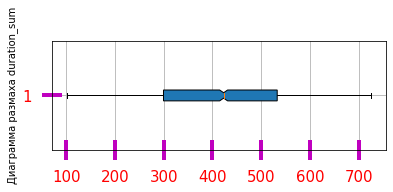

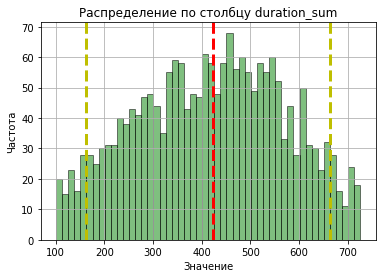

--------------------------------------------------------------


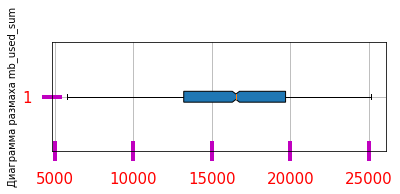

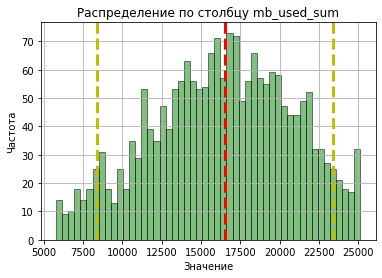

--------------------------------------------------------------


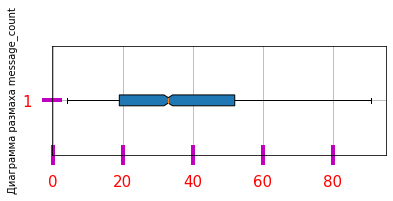

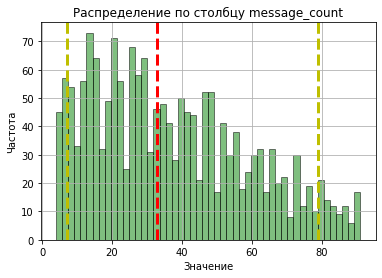

--------------------------------------------------------------


In [63]:
smart_list = ['duration_sum', 'mb_used_sum', 'message_count']
for i in smart_list:
    my_hist(report_smart, i)  

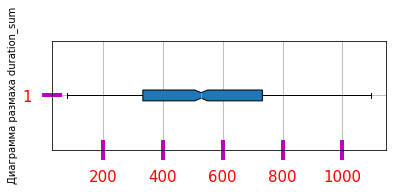

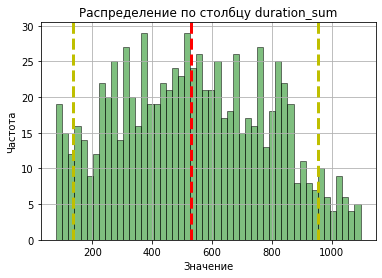

--------------------------------------------------------------


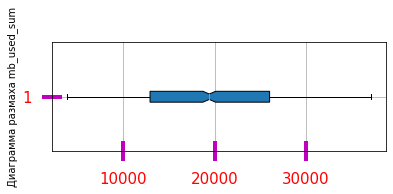

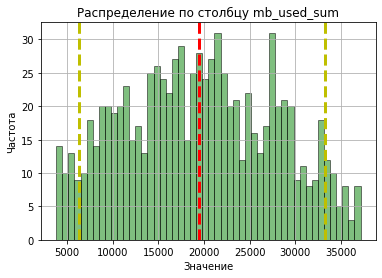

--------------------------------------------------------------


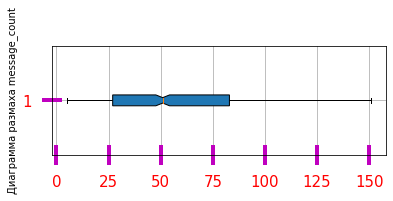

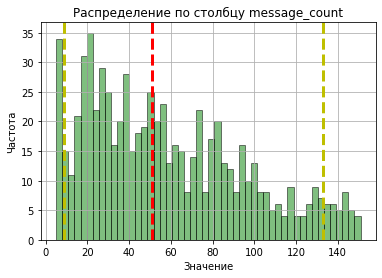

--------------------------------------------------------------


In [64]:
ultra_list = ['duration_sum', 'mb_used_sum', 'message_count']
for i in ultra_list:
    my_hist(report_ultra, i)  

### Вывод

Тариф "Смарт":
- в основном пользователи проговаривают в месяц от 300 до 530 минут. Датасет немного скошен влево, медиана около 420 мин, значит достаточно много тех, кто тратит меньше медианного времени. 
- в основном тратят интернета от 13000 до 19000 мб
- в основном отправляют ~20-50 сообщений в месяц. Датасет скошен вправо, медиана ~35 и достаточно много пользоваетелей отправляют более 35 сообщений в месяц

Тариф "Ультра":

- в основном пользователи проговаривают в месяц от 350 до 750 минут. Датасет симметричен, медиана ~520 мин.
- в основном тратят интернета от 13000 до 27000 мб
- в основном отправляют ~27-85 сообщений в месяц. Датасет скошен вправо, медиана ~51 и достаточно много пользоваетелей отправляют более 51 сообщений в месяц



## Проверка гипотез


**Нулевая гипотеза H₀:**<br>
Средняя выручка пользователей тарифа «Ультра» равна средней выручке тарифа «Смарт»

**Альтернативная гипотеза H₁:**<br>
Средние выручки пользователей тарифов «Ультра» и «Смарт» различаются

In [65]:
sample_1 = report_smart['profit']
sample_2 = report_ultra['profit']
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


Получается, что мы отвергаем гипотезу о равенстве средней выручки двух тарифов и принимаем альтернативную гипотезу - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.
Мы приняли alpha = 0.05 (общепринятое пороговое значение), что означает, что мы признаём 5%-ю вероятность слишком малой и на этом основании отвергаем нулевую гипотезу.

**Нулевая гипотеза H₀:**<br>
Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

**Альтернативная гипотеза H₁:**<br>
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [66]:
report_moscow = report[report['city'] == 'Москва']

In [67]:
report_others_city = report[report['city'] != 'Москва']

In [68]:
array_1 = report_moscow['profit']
array_2 = report_others_city['profit']
alpha = 0.05
results = st.ttest_ind(array_1, array_2, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


Тест показал, что нулевую гипотезу отвергнуть не получилось, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не различаются. Другими словами с вероятностью в 45% различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

Посчитаем средние значения выручки для пользователей обоих тарифов, чтобы ответить на вопрос, какой же тариф приносит больше денег компании "Мегалайн".

In [69]:
report_smart['profit'].mean()

1233.3494665489009

In [70]:
report_ultra['profit'].mean()

2060.5299710501267

### Вывод

Исходя из проверки гипотез мы можем сказать, что cредние выручки пользователей тарифов «Ультра» и «Смарт» различаются, а что из них больше сказать не сможем, тк наша гипотеза двухсторонняя. Однако посчитав среднее значение выручки в месяц для пользователей "Смарт" (1233) и "Ультра" (2061) с уверенностью можем сказать, что тариф "Ультра" компании "Мегалайн" приносит больше денег.

## Вывод

Пользователи тарифа "Ультра" потребляют больше минут разговора, интернет-трафика и отправляют больше сообщений, чем пользователи тарифа "Смарт". Если сравнить ежемесячную плату ("Смарт" - 550 руб, "Ультра" 1950 руб) со средними значениями выручки в месяц (1233 руб и 2061 руб соответственно) то можно сказать, что пользователи тарифа "Смарт" в основном потребляют больше, чем предусмотрено тарифом.
Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не различаются. 
Тариф "Ультра" компании "Мегалайн" приносит больше денег.